<a href="https://colab.research.google.com/github/samuelshoun/Useful-MWEs/blob/main/monty_hall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I sometimes teach or mentor on the topic of probability and risked decision-making in oil & gas. A common teaching tool is the Monty Hall problem. In the notebook, I test the solution by simulating 1,000 trials and comparing the outcome of switching versus staying (keeping the original choice in door).

Learn more about the Monty Hall problem <a href='https://en.wikipedia.org/wiki/Monty_Hall_problem'>here</a>.

In [7]:
import numpy as np
import pandas as pd

In [8]:
# choose the number of trials
n = 1000

# label the door options
doors = ['A', 'B', 'C']

# true car location for each trial
car_at = np.random.choice(doors, size=n)

# randomly assigned contestant choice of door
choice = np.random.choice(doors, size=n)

# the door Monty opens after choosing from the remaining non-car doors
open = [np.random.choice([door for door in doors if door != car_at[i] and door != choice[i]]) for i in range(n)]

# the remaining door the contestant may switch to
switch = [[door for door in doors if door != choice[i] and door != open[i]][0] for i in range(n)]

In [9]:
# frame the data
df = pd.DataFrame({
    'car_at': car_at,
    'choice': choice,
    'monty_opens': open,
    'switch': switch
    })

# label each trial as a win for switch or a win for stay (original choice)
df['stay_wins'] = (df['choice'] == df['car_at']).astype(int)
df['switch_wins'] = (df['switch'] == df['car_at']).astype(int)

# view the simulation
df

,car_at,choice,monty_opens,switch,stay_wins,switch_wins
0,C,C,B,A,1,0
1,B,B,C,A,1,0
2,A,C,B,A,0,1
3,A,A,C,B,1,0
4,A,A,B,C,1,0
...,...,...,...,...,...,...
995,A,A,C,B,1,0
996,A,A,C,B,1,0
997,C,A,B,C,0,1
998,A,C,B,A,0,1


In [4]:
# count the wins for stay versus switch
df[['stay_wins', 'switch_wins']].sum(axis=0)

stay_wins      343
switch_wins    657
dtype: int64

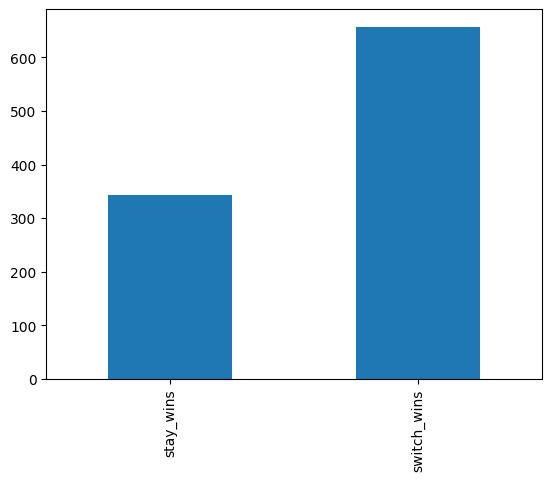

In [5]:
# plot the counts
df[['stay_wins', 'switch_wins']].sum(axis=0).plot(kind='bar');

We can see that, consistent with the common solution, switching door choices leads to twice as many wins as staying with the original choice.